티머니 https://www.tmoney.co.kr

#### 데이터 로드

In [3]:
import pandas as pd

In [2]:
df = pd.read_csv('subway_202101.csv', thousands = ',')
df.head()

,사용월,호선명,역ID,지하철역,유임승차,유임하차,무임승차,무임하차,작업일시
0,2021-01,1호선,1,서울역,731660,678117,127534,118937,2021-02-03 09:49:34
1,2021-01,1호선,10,동묘앞,98645,105308,113919,115644,2021-02-03 09:49:34
2,2021-01,1호선,2,시청,371942,366139,46231,43433,2021-02-03 09:49:34
3,2021-01,1호선,3,종각,598363,567563,84544,78565,2021-02-03 09:49:34
4,2021-01,1호선,4,종로3가,313943,281737,187603,175431,2021-02-03 09:49:34


#### 무임승차 비율 확인

In [4]:
df['무임승차비율'] = df['무임승차'] / (df['무임승차'] + df['유임승차'])
df

,사용월,호선명,역ID,지하철역,유임승차,유임하차,무임승차,무임하차,작업일시,무임승차비율
0,2021-01,1호선,1,서울역,731660,678117,127534,118937,2021-02-03 09:49:34,0.148434
1,2021-01,1호선,10,동묘앞,98645,105308,113919,115644,2021-02-03 09:49:34,0.535928
2,2021-01,1호선,2,시청,371942,366139,46231,43433,2021-02-03 09:49:34,0.110555
3,2021-01,1호선,3,종각,598363,567563,84544,78565,2021-02-03 09:49:34,0.123800
4,2021-01,1호선,4,종로3가,313943,281737,187603,175431,2021-02-03 09:49:34,0.374049
...,...,...,...,...,...,...,...,...,...,...
599,2021-01,우이신설선,705,북한산보국문,99921,97636,28310,29192,2021-02-03 09:49:34,0.220773
600,2021-01,우이신설선,706,정릉,67390,63786,30469,29394,2021-02-03 09:49:34,0.311356
601,2021-01,우이신설선,707,성신여대입구(돈암),50177,58328,19635,18769,2021-02-03 09:49:34,0.281255
602,2021-01,우이신설선,708,보문,22999,23078,10301,10532,2021-02-03 09:49:34,0.309339


#### 무임승차 비율이 가장 높은 역의 승/하차 현황

In [5]:
# 무임승차 비율이 가장 높은 역의 현황
df[df['무임승차비율'] == df['무임승차비율'].max()].iloc[0,4:8]

유임승차    21105
유임하차    16051
무임승차    38785
무임하차    35334
Name: 208, dtype: object

In [7]:
# 유임승차 비율 = (유임승차 / 전체 승하차 횟수)*100
station = df[df['무임승차비율'] == df['무임승차비율'].max()].iloc[0,4:8]
유임승차 = station['유임승차']
유임하차 = station['유임하차']
무임승차 = station['무임승차']
무임하차 = station['무임하차']

total = station.sum(axis=0)

In [12]:
station

유임승차    21105
유임하차    16051
무임승차    38785
무임하차    35334
Name: 208, dtype: object

In [13]:
total

111275

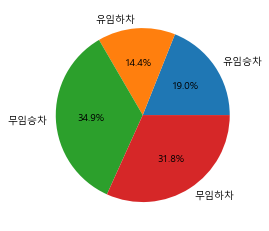

In [10]:
# 무임승차 비율이 가장 높은 역의 승/하차 현황 그래프
import matplotlib.pyplot as plt

plt.rc('font', family = 'Malgun Gothic')
plt.pie([유임승차.sum() / total * 100, 유임하차.sum() / total * 100,
         무임승차.sum() / total * 100, 무임하차.sum() / total * 100],
       labels = ['유임승차', '유임하차', '무임승차', '무임하차'],
       autopct = '%.1f%%')
plt.show()

#### 07~10시 가장 많은 사람이 타고 내리는 역

In [38]:
df = pd.read_csv('subway_2_202101.csv', thousands = ',')
df = df.iloc[1:,:]
df.head()

,사용월,호선명,역ID,지하철역,04:00:00~04:59:59,Unnamed: 5,05:00:00~05:59:59,Unnamed: 7,06:00:00~06:59:59,Unnamed: 9,...,Unnamed: 43,00:00:00~00:59:59,Unnamed: 45,01:00:00~01:59:59,Unnamed: 47,02:00:00~02:59:59,Unnamed: 49,03:00:00~03:59:59,Unnamed: 51,작업일시
1,2021-01,1호선,1.0,서울역,445,8,"6,832","4,781","8,835","24,937",...,"3,751",32,398,0,2,0,0,0,0,2021-02-03 09:49:40
2,2021-01,1호선,10.0,동묘앞,78,2,"2,391",738,"2,761","3,527",...,"1,502",1,704,0,8,0,0,0,0,2021-02-03 09:49:40
3,2021-01,1호선,2.0,시청,18,1,"1,489","2,990","2,235","14,570",...,629,4,48,0,1,0,0,0,0,2021-02-03 09:49:40
4,2021-01,1호선,3.0,종각,113,1,"1,852","3,464","2,578","18,288",...,785,10,100,1,1,0,0,0,0,2021-02-03 09:49:40
5,2021-01,1호선,4.0,종로3가,109,4,"2,187","2,427","2,374","8,473",...,"1,104",7,194,0,3,0,0,0,0,2021-02-03 09:49:40


In [ ]:
# columns

In [40]:
# 역명과 07~10시 데이터 확인
df2 = df.iloc[:,[3,10,11,12,13,14,15,16,17]]
df2.head()

,지하철역,07:00:00~07:59:59,Unnamed: 11,08:00:00~08:59:59,Unnamed: 13,09:00:00~09:59:59,Unnamed: 15,10:00:00~10:59:59,Unnamed: 17
1,서울역,"27,116","66,431","43,277","145,325","31,927","91,672","29,589","44,874"
2,동묘앞,"4,457","5,734","6,977","14,687","5,588","13,409","6,386","14,013"
3,시청,"4,971","47,793","6,119","131,340","6,335","62,133","7,012","23,760"
4,종각,"4,413","77,560","6,631","165,202","7,997","100,421","10,911","42,055"
5,종로3가,"3,297","18,316","5,367","52,803","7,144","54,311","13,136","42,285"


In [41]:
# 07~10시 이동인구 합계
df2['출근'] = df2.iloc[:,1:].sum(axis=1)
df2.head()

C:\Users\admin\AppData\Local\Temp\ipykernel_13744\3237155274.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['출근'] = df2.iloc[:,1:].sum(axis=1)


,지하철역,07:00:00~07:59:59,Unnamed: 11,08:00:00~08:59:59,Unnamed: 13,09:00:00~09:59:59,Unnamed: 15,10:00:00~10:59:59,Unnamed: 17,출근
1,서울역,"27,116","66,431","43,277","145,325","31,927","91,672","29,589","44,874","27,11666,43143,277145,32531,92791,67229,58944,874"
2,동묘앞,"4,457","5,734","6,977","14,687","5,588","13,409","6,386","14,013","4,4575,7346,97714,6875,58813,4096,38614,013"
3,시청,"4,971","47,793","6,119","131,340","6,335","62,133","7,012","23,760","4,97147,7936,119131,3406,33562,1337,01223,760"
4,종각,"4,413","77,560","6,631","165,202","7,997","100,421","10,911","42,055","4,41377,5606,631165,2027,997100,42110,91142,055"
5,종로3가,"3,297","18,316","5,367","52,803","7,144","54,311","13,136","42,285","3,29718,3165,36752,8037,14454,31113,13642,285"


In [42]:
df3 = df2.sort_values(by='출근', ascending=False)
df3.iloc[:5,[0,-1]]

,지하철역,출근
38,서울대입구(관악구청),"99,51322,507150,22149,64395,94648,22149,82038,708"
162,역곡,"98,93210,69594,55322,76147,68617,70529,58916,527"
350,춘천,"9778041,0271,2851,1211,1881,057930"
388,까치산,"96,4408,096127,35517,20162,25914,26934,88214,436"
288,운길산,"9563479999818491,4846841,771"


#### 시간대별 승차인원이 가장 많은 역

In [43]:
# 시간대별 승차인원 합계
mx = df.iloc[:,range(4,52,2)].max(axis=0).tolist()
print(mx)

['99', '997', '982', '99,513', '999', '95,946', '981', '984', '946', '986', '994', '98', '99,754', '997', '94,641', '985', '99,601', '950', '989', '989', '96', '3', '5', '0']


In [46]:
mx_station = []
for i, e in enumerate(mx) :
    if e :
        mx_station.append('%s (%s)'
                          % (df[df.iloc[:,i*2+4] == e]['지하철역'].iloc[0], i+4))
mx_station

['건대입구 (4)',
 '남춘천 (5)',
 '가평 (6)',
 '서울대입구(관악구청) (7)',
 '운길산 (8)',
 '서울대입구(관악구청) (9)',
 '서울역 (10)',
 '파주 (11)',
 '국수 (12)',
 '둔촌오륜 (13)',
 '파주 (14)',
 '달월 (15)',
 '선릉 (16)',
 '강촌 (17)',
 '혜화 (18)',
 '용문 (19)',
 '고속터미널 (20)',
 '용답 (21)',
 '올림픽공원(한국체대) (22)',
 '매봉 (23)',
 '주안 (24)',
 '병점 (25)',
 '고속터미널 (26)',
 '서울역 (27)']

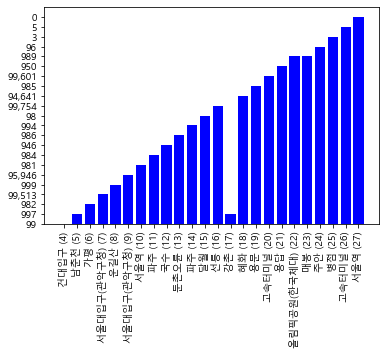

In [48]:
plt.rc('font', family = 'Malgun Gothic')
plt.rcParams['axes.unicode_minus'] = False

plt.bar(range(len(mx_station)), mx, color='blue')
plt.xticks(range(len(mx_station)), mx_station, rotation = 90)
plt.show()